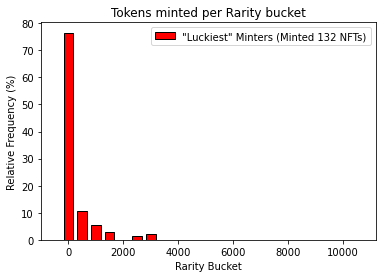

In [3]:
"""
Generate Plot
"""
import pandas as pd
import matplotlib.pyplot as plt

TOKENS = 10000
BUCKET_WIDTH = 500
BINS = int(TOKENS / BUCKET_WIDTH)
BAR_WIDTH = 350
PLOT_COLOR = "r"
LOWER_BOUND = -1000
UPPER_BOUND = 11200

grifter_addresses = [
    "0x3D9f185369eC7A6fD1be7C1B9f828C9C35A862Bd",
    "0xCEFcDBfd67D70C091a4a7a4696ebBc94c06B832E",
    "0xD9ADcc4b8d9aD089f262C0F322401B944cd43231",
    "0x0D78579978566EE2aCf97fDb2f37602C801F42ff",
    "0xB3879479eC82638e3c5E4247678eD6fCa771880b",
    "0xfb8c9c42b9ba4502a72b0ba1bab35640f44c2dab",
]

for i in range(0, len(grifter_addresses)):
    grifter_addresses[i] = grifter_addresses[i].lower()


minting = pd.read_csv("../data/superlativesecretsociety_minting.csv")
grifter_minting = minting[minting['to_account'].isin(grifter_addresses)]
grifter_mint_count = len(grifter_minting)

grifter_dict = {}
total_sales = 0

for i in range(0, BINS): 
    lower = i * BUCKET_WIDTH    
    upper = (i + 1) * BUCKET_WIDTH

    temp_grifter_df = grifter_minting[ (grifter_minting["rank"] > lower) & (grifter_minting["rank"] < upper)]

    grifter_dict[lower] = len(temp_grifter_df) / grifter_mint_count * 100


plt.bar(grifter_dict.keys(), grifter_dict.values(), width = BAR_WIDTH, label='"Luckiest" Minters (Minted {} NFTs)'.format(grifter_mint_count), color = PLOT_COLOR, edgecolor ='black')
plt.legend(loc='upper right')
plt.xlabel("Rarity Bucket")
plt.ylabel("Relative Frequency (%)")
plt.title("Tokens minted per Rarity bucket")
plt.xlim(LOWER_BOUND, UPPER_BOUND)
plt.savefig("../figures/luckiest_minters.png", dpi = 300)